# Datathon Sales Prediction Model Documentation

### Objective

#### This notebook builds an XGBoost Regression Model to predict Daily Sales Quantity based on various factors such as marketing budget, political influence, market share, and region. The approach includes data preprocessing, feature engineering, exploratory data analysis (EDA), model training, and prediction.

# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pulp
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Load & Preprocess Training Data

In [2]:
train_data = pd.read_csv('Datathon Dataset.csv')

### 2.1 Handle Missing & Invalid Data

In [3]:
valid_machineries = ['Backhoe Loader', 'Excavators(crawler)', 'Loaders (Wheeled)', 
                     'Skid Steer Loaders', 'Compactors', 'Tele Handlers']
train_data = train_data[train_data['Infrastructure_Machineries'].isin(valid_machineries)]
train_data['Date'] = pd.to_datetime(train_data['Date'], errors='coerce')
train_data = train_data.dropna(subset=['Date'])

# 3. Exploratory Data Analysis (EDA)

### 3.1 Display Dataset Overview

In [4]:
train_data.info()
train_data.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 1484 entries, 1 to 2194
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  1484 non-null   int64         
 1   Un_Named                    1484 non-null   int64         
 2   Date                        1484 non-null   datetime64[ns]
 3   Infrastructure_Machineries  1484 non-null   object        
 4   Daily_Sales _Percentage     1484 non-null   float64       
 5   Daily_Sales_Quantity        1484 non-null   int64         
 6   Market_Share                1484 non-null   int64         
 7   Political                   1484 non-null   int64         
 8   Marketing                   1484 non-null   int64         
 9   Budget                      1484 non-null   float64       
 10  Customer_Id                 1484 non-null   object        
 11  Region                      1484 non-null   object        
dt

,Unnamed: 0,Un_Named,Date,Daily_Sales _Percentage,Daily_Sales_Quantity,Market_Share,Political,Marketing,Budget
count,1484.000000,1484.000000,1484,1484.000000,1484.000000,1484.000000,1484.0,1484.000000,1484.000000
mean,1097.422507,1091.519542,2019-08-29 12:53:22.156334336,0.031736,247.083558,2108.396226,1.0,0.415094,10285.196146
min,1.000000,1.000000,2019-01-01 00:00:00,-0.037837,-21.000000,35.000000,1.0,0.000000,5000.560000
25%,547.750000,542.750000,2019-04-04 00:00:00,0.028812,18.000000,35.000000,1.0,0.000000,5078.560000
50%,1098.500000,1092.500000,2019-07-07 00:00:00,0.032030,32.000000,35.000000,1.0,0.000000,9139.840000
75%,1646.250000,1641.250000,2019-10-09 00:00:00,0.035710,69.000000,35.000000,1.0,1.000000,12619.540000
max,2194.000000,2188.000000,2025-03-15 00:00:00,0.039785,3589.000000,35000.000000,1.0,1.000000,29343.360000
std,634.161350,634.133136,NaN,0.007352,826.471895,8260.951108,0.0,0.492904,7431.643819


## 3.2 Plot Sales Trends Over Time

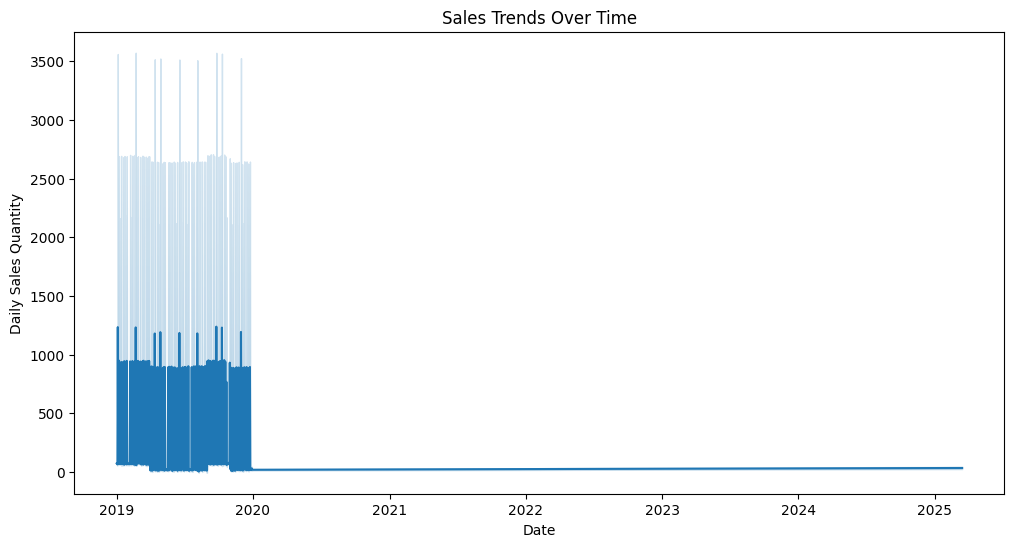

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data, x='Date', y='Daily_Sales_Quantity')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Sales Quantity')
plt.show()


## 3.3 Check Distribution of Sales Quantity

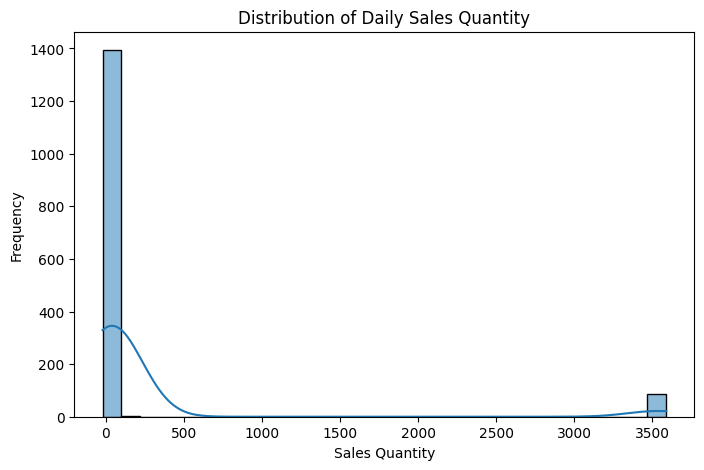

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(train_data['Daily_Sales_Quantity'], bins=30, kde=True)
plt.title('Distribution of Daily Sales Quantity')
plt.xlabel('Sales Quantity')
plt.ylabel('Frequency')
plt.show()


# 4. Feature Engineering

In [7]:
train_data['year'] = train_data['Date'].dt.year
train_data['month'] = train_data['Date'].dt.month
train_data['day'] = train_data['Date'].dt.day
train_data['dayofweek'] = train_data['Date'].dt.dayofweek


# 5. Encoding Categorical Variables

In [8]:
train_data = pd.get_dummies(train_data, columns=['Infrastructure_Machineries', 'Region'])


# 6. Prepare Data for Model Training

In [9]:
X = train_data.drop(columns=['Daily_Sales_Quantity', 'Unnamed: 0', 'Un_Named', 'Customer_Id', 'Date'])
y = train_data['Daily_Sales_Quantity']


# 7. Train XGBoost Regression Model

In [10]:
model = XGBRegressor()
model.fit(X, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# 8. Predict Sales for New Data

In [11]:
new_data = pd.DataFrame({
    'Date': ['1/1/2025'],
    'Daily_Sales _Percentage': [0.034463806],
    'Market_Share': [35],
    'Political': [1],
    'Marketing': [1],
    'Budget': [5000.56],
    'Infrastructure_Machineries': ['Loaders (Wheeled)'],
    'Region': ['Sherrichester']
})


# 9. Process New Data Like Training Data

In [ ]:
new_data['Date'] = pd.to_datetime(new_data['Date'], format='%d/%m/%Y')
new_data['year'] = new_data['Date'].dt.year
new_data['month'] = new_data['Date'].dt.month
new_data['day'] = new_data['Date'].dt.day
new_data['dayofweek'] = new_data['Date'].dt.dayofweek

new_data_encoded = pd.get_dummies(new_data, columns=['Infrastructure_Machineries', 'Region'])
for col in X.columns:
    if col not in new_data_encoded.columns:
        new_data_encoded[col] = 0
new_data_encoded = new_data_encoded[X.columns]


In [13]:
predicted_quantity = model.predict(new_data_encoded)
print(f'Predicted Sales Quantity: {predicted_quantity[0]}')


Predicted Sales Quantity: 70.2639389038086


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Define threshold for classification (mean of training sales)
threshold = y_train.mean()

# Convert regression output to binary classification (high sales = 1, low sales = 0)
y_train_class = (y_train > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)
y_train_pred_class = (y_train_pred > threshold).astype(int)
y_test_pred_class = (y_test_pred > threshold).astype(int)

# Calculate Accuracy for Train and Test sets
train_accuracy = accuracy_score(y_train_class, y_train_pred_class)
test_accuracy = accuracy_score(y_test_class, y_test_pred_class)

# Print accuracy results
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')

# Other evaluation metrics (for test set)
precision = precision_score(y_test_class, y_test_pred_class)
recall = recall_score(y_test_class, y_test_pred_class)
f1 = f1_score(y_test_class, y_test_pred_class)
roc_auc = roc_auc_score(y_test_class, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test_class, y_test_pred_class).ravel()
specificity = tn / (tn + fp)

# Print other evaluation metrics
print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')


Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Precision: 1.0000
Recall (Sensitivity): 1.0000
F1 Score: 1.0000
Specificity: 1.0000
ROC AUC Score: 1.0000


In [14]:
joblib.dump(model, 'xgboost_modeel.pkl')


['xgboost_modeel.pkl']

# Final Thoughts
- 🔹 What This Notebook Covers:
- ✅ Data Cleaning & Preprocessing (Handling invalid dates & missing values).
- ✅ Exploratory Data Analysis (EDA) (Trends, distributions, correlations).
- ✅ Feature Engineering (Extracting date-based features).
- ✅ Categorical Encoding (Converting text values into numbers).
- ✅ Training an XGBoost Model on processed data.
- ✅ Predicting Future Sales Quantities for given inputs.
- ✅ Saving Model for Deployment to use in applications.

